<a href="https://colab.research.google.com/github/pragyeshmishy/Flipkart-SentimentAnalysis/blob/main/Flipkart_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Importing the dataset
DATASET_COLUMNS=['Name','Account','Date','Comments','Retweet','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/twiterdata.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,Name,Account,Date,Comments,Retweet,text
200,Business Today,@business_today,"May 7, 2018",NaN,NaN,#Instagram has launched payments option within...
79,Aggarwal Books India,@Aggarwal_Books,"Sep 15, 2020",NaN,NaN,Replying to \n@FlipkartSellers
234,TRANSFIN. Making Finance Work for You,@TFinMedia,"Oct 20, 2017",NaN,NaN,#Amazon inject INR260cr into its payments unit...
334,Buy Domains India,@buydomainsindia,"Sep 13, 2016",NaN,NaN,Replying to \n@Branduble
131,Marketing Stories,@Marketing_Stry,"Oct 25, 2019",1,1,Did You Know?\nDigital Payments App PhonePe is...


In [ ]:
df = df.iloc[1:]
df.head(5)


,Name,Account,Date,Comments,Retweet,text
1,Meenakshi J Goyal,@meenakshigoyalg,Oct-30,3,2,@Flipkart\n I am afraid now to do online paym...
2,mystartupyatra,@mystartupyatra,Oct-26,NaN,1,Rupifi : Powering B2B Transactions for SMEs \n...
3,Marketing Motivation,@marketing_motiv,Oct-23,NaN,NaN,Digital payments leader PhonePe has started ch...
4,Girish Purohit,@GJ_PUROHIT,Oct-22,1,2,My \n@AxisBank\n \n@AxisBankSupport\n #Flipkar...
5,Nitin Sethi,@nitinsethi80,Oct-20,NaN,NaN,Flipkart Wholesale partners with Rupifi to off...


In [ ]:
df['text']=df['text'].str.lower()
df['text']

1      @flipkart\n  i am afraid now to do online paym...
2      rupifi : powering b2b transactions for smes \n...
3      digital payments leader phonepe has started ch...
4      my \n@axisbank\n \n@axisbanksupport\n #flipkar...
5      flipkart wholesale partners with rupifi to off...
                             ...                        
330    #flipkart #bigbilliondaystonight not getting p...
331    #digital #disruption has reached #apac, with #...
332    #newly #launched #mobile #payments arm of #fli...
333    http://phonepewallet.com is for sale on \n@fli...
334                             replying to \n@branduble
Name: text, Length: 334, dtype: object

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

***Cleaning and removing the above stop words list from the tweet text***

In [ ]:
# Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

1    @flipkart afraid online payments. better chose...
2    rupifi : powering b2b transactions smes #india...
3    digital payments leader phonepe started chargi...
4    @axisbank @axisbanksupport #flipkart cc charge...
5    flipkart wholesale partners rupifi offer bnpl ...
Name: text, dtype: object

**Cleaning and removing punctuations**

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

330    flipkart bigbilliondaystonight not getting pay...
331    digital disruption reached apac kakaopay flipk...
332    newly launched mobile payments arm flipkart ph...
333    httpphonepewalletcom sale flippa  httpsflippac...
334                                   replying branduble
Name: text, dtype: object

**Cleaning and removing repeating characters and URLs**

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].tail()

330    flipkart bigbilliondaystonight not getting pay...
331    digital disruption reached apac kakaopay flipk...
332    newly launched mobile payments arm flipkart ph...
333    httpphonepewalletcom sale flippa  httpsflippac...
334                                   replying branduble
Name: text, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].tail(15)

320    flipkartowned mobile payments startup phonepe ...
321    flipkart phonepe wallet use phonepe upi based ...
322    flipkartbigbillion sale flop payments not work...
323    flipkart bigbilliondaystonight not getting pay...
324    flipkart bigbilliondaystonight not getting pay...
325    digital disruption reached apac kakaopay flipk...
326    newly launched mobile payments arm flipkart ph...
327    httpphonepewalletcom sale flippa  httpsflippac...
328                                   replying branduble
329    flipkart bigbilliondaystonight not getting pay...
330    flipkart bigbilliondaystonight not getting pay...
331    digital disruption reached apac kakaopay flipk...
332    newly launched mobile payments arm flipkart ph...
333    httpphonepewalletcom sale flippa  httpsflippac...
334                                   replying branduble
Name: text, dtype: object

**Cleaning and removing Numeric numbers**

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: str(cleaning_numbers(x)))
df['text'].tail(15)

320    flipkartowned mobile payments startup phonepe ...
321    flipkart phonepe wallet use phonepe upi based ...
322    flipkartbigbillion sale flop payments not work...
323    flipkart bigbilliondaystonight not getting pay...
324    flipkart bigbilliondaystonight not getting pay...
325    digital disruption reached apac kakaopay flipk...
326    newly launched mobile payments arm flipkart ph...
327    httpphonepewalletcom sale flippa  httpsflippac...
328                                   replying branduble
329    flipkart bigbilliondaystonight not getting pay...
330    flipkart bigbilliondaystonight not getting pay...
331    digital disruption reached apac kakaopay flipk...
332    newly launched mobile payments arm flipkart ph...
333    httpphonepewalletcom sale flippa  httpsflippac...
334                                   replying branduble
Name: text, dtype: object

**Getting tokenization of tweet text**

In [ ]:
# import nltk 
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize

# # for i in df['text']:
# df['text'] = df['text'].apply(word_tokenize)
# df["text"]
  # print(i)



# sent_tokenize(df['text'])
# df['text'] = df['text'].apply(tokenizer.tokenize)


In [ ]:
# df.drop("w_token", axis=1)

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: stemming_on_text(x))
df['text'].head()

1    flipkart afraid online payments better chose c...
2    rupifi  powering bb transactions smes india so...
3    digital payments leader phonepe started chargi...
4    axisbank axisbanksupport flipkart cc charged i...
5    flipkart wholesale partners rupifi offer bnpl ...
Name: text, dtype: object

In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   334


In [ ]:
# pip install vaderSentiment
df["text"] = df["text"].replace(',','')
df["text"]

1      flipkart afraid online payments better chose c...
2      rupifi  powering bb transactions smes india so...
3      digital payments leader phonepe started chargi...
4      axisbank axisbanksupport flipkart cc charged i...
5      flipkart wholesale partners rupifi offer bnpl ...
                             ...                        
330    flipkart bigbilliondaystonight not getting pay...
331    digital disruption reached apac kakaopay flipk...
332    newly launched mobile payments arm flipkart ph...
333    httpphonepewalletcom sale flippa  httpsflippac...
334                                   replying branduble
Name: text, Length: 334, dtype: object

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
dfsent=df["text"]
dfsent

1      flipkart afraid online payments better chose c...
2      rupifi  powering bb transactions smes india so...
3      digital payments leader phonepe started chargi...
4      axisbank axisbanksupport flipkart cc charged i...
5      flipkart wholesale partners rupifi offer bnpl ...
                             ...                        
330    flipkart bigbilliondaystonight not getting pay...
331    digital disruption reached apac kakaopay flipk...
332    newly launched mobile payments arm flipkart ph...
333    httpphonepewalletcom sale flippa  httpsflippac...
334                                   replying branduble
Name: text, Length: 334, dtype: object

In [ ]:
df['scores'] = df['text'].apply(lambda review: analyzer.polarity_scores(review))

df.head()

,Name,Account,Date,Comments,Retweet,text,scores
1,Meenakshi J Goyal,@meenakshigoyalg,Oct-30,3,2,flipkart afraid online payments better chose c...,"{'neg': 0.079, 'neu': 0.81, 'pos': 0.112, 'com..."
2,mystartupyatra,@mystartupyatra,Oct-26,NaN,1,rupifi powering bb transactions smes india so...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Marketing Motivation,@marketing_motiv,Oct-23,NaN,NaN,digital payments leader phonepe started chargi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Girish Purohit,@GJ_PUROHIT,Oct-22,1,2,axisbank axisbanksupport flipkart cc charged i...,"{'neg': 0.321, 'neu': 0.412, 'pos': 0.268, 'co..."
5,Nitin Sethi,@nitinsethi80,Oct-20,NaN,NaN,flipkart wholesale partners rupifi offer bnpl ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,Name,Account,Date,Comments,Retweet,text,scores,compound
1,Meenakshi J Goyal,@meenakshigoyalg,Oct-30,3,2,flipkart afraid online payments better chose c...,"{'neg': 0.079, 'neu': 0.81, 'pos': 0.112, 'com...",0.2177
2,mystartupyatra,@mystartupyatra,Oct-26,NaN,1,rupifi powering bb transactions smes india so...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Marketing Motivation,@marketing_motiv,Oct-23,NaN,NaN,digital payments leader phonepe started chargi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Girish Purohit,@GJ_PUROHIT,Oct-22,1,2,axisbank axisbanksupport flipkart cc charged i...,"{'neg': 0.321, 'neu': 0.412, 'pos': 0.268, 'co...",0.0516
5,Nitin Sethi,@nitinsethi80,Oct-20,NaN,NaN,flipkart wholesale partners rupifi offer bnpl ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [ ]:
df.head(15)

,Name,Account,Date,Comments,Retweet,text,scores,compound
1,Meenakshi J Goyal,@meenakshigoyalg,Oct-30,3,2,flipkart afraid online payments better chose c...,"{'neg': 0.079, 'neu': 0.81, 'pos': 0.112, 'com...",0.2177
2,mystartupyatra,@mystartupyatra,Oct-26,NaN,1,rupifi powering bb transactions smes india so...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Marketing Motivation,@marketing_motiv,Oct-23,NaN,NaN,digital payments leader phonepe started chargi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Girish Purohit,@GJ_PUROHIT,Oct-22,1,2,axisbank axisbanksupport flipkart cc charged i...,"{'neg': 0.321, 'neu': 0.412, 'pos': 0.268, 'co...",0.0516
5,Nitin Sethi,@nitinsethi80,Oct-20,NaN,NaN,flipkart wholesale partners rupifi offer bnpl ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
6,YP Buzz,@ypbuzzofficial,Aug-24,NaN,2,rbi issue new guideline jan httpsypbuzzcomlea...,"{'neg': 0.0, 'neu': 0.934, 'pos': 0.066, 'comp...",0.1779
7,Sharanu.N,@sharanu_ja,Aug-21,2,NaN,dear flipkart happened android app app not acc...,"{'neg': 0.13, 'neu': 0.715, 'pos': 0.155, 'com...",0.1068
8,Renjith R,@renjithr2081,Aug-18,NaN,1,phonepe closes mn round participation tencent...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
9,????????????????????????????,@MarathaaWarrior,Aug-14,1,NaN,upi digital payments ondc going ecommerce woul...,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.7096
10,Biswajit Gaigaria,@BGaigaria,Aug-13,3,NaN,dear flipkart order no o canceled successfull...,"{'neg': 0.073, 'neu': 0.733, 'pos': 0.193, 'co...",0.5574


In [ ]:
target=[] 
for c in df["compound"]:
  if c>0:
    target.append("Positive")  
  elif c<0:
    target.append("Negative")  
  else:
    target.append("Neutral")



In [ ]:
df['target'] = target

In [ ]:
df.head()

,Name,Account,Date,Comments,Retweet,text,scores,compound,target
1,Meenakshi J Goyal,@meenakshigoyalg,Oct-30,3,2,flipkart afraid online payments better chose c...,"{'neg': 0.079, 'neu': 0.81, 'pos': 0.112, 'com...",0.2177,Positive
2,mystartupyatra,@mystartupyatra,Oct-26,NaN,1,rupifi powering bb transactions smes india so...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,Marketing Motivation,@marketing_motiv,Oct-23,NaN,NaN,digital payments leader phonepe started chargi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,Girish Purohit,@GJ_PUROHIT,Oct-22,1,2,axisbank axisbanksupport flipkart cc charged i...,"{'neg': 0.321, 'neu': 0.412, 'pos': 0.268, 'co...",0.0516,Positive
5,Nitin Sethi,@nitinsethi80,Oct-20,NaN,NaN,flipkart wholesale partners rupifi offer bnpl ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


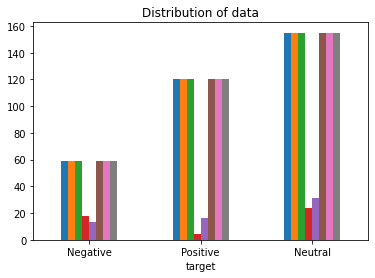

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive',"Neutral"], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

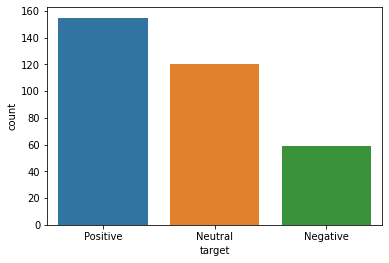

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
df["target"].value_counts()

Positive    155
Neutral     120
Negative     59
Name: target, dtype: int64

**As it is clearly visible, even after a lot of negative reviews regarding the payment process of Flipkart, most sentiments seems to be quite positive**